In [1]:
import os
import numpy as np
import pandas as pd
from scipy import fftpack
import matplotlib.pyplot as plt


present_dir = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/'

# Fetch all the files for baby present data which will be used for training

file_paths_present = []

all_files = os.listdir(present_dir)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
for i in csv_files:
    file_path = present_dir + i
    file_paths_present.append(file_path)
file_paths_present

['/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/adc_1000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/BabyData_6.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/adc_19000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/BabyData_5.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/adc_7000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/adc_13000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/adc_18000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/adc_6000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/BabyData_11.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithBaby_test/adc_12000.csv']

In [2]:
# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file paths and append each DataFrame to the list
for file in file_paths_present:
    df = pd.read_csv(file, header=None, index_col=False)
    dfs.append(df)

# Concatenate all the DataFrames in the list
combined_df_present = pd.concat(dfs, ignore_index=True)
train_present_len = len(combined_df_present)
print(train_present_len)
combined_df_present

10399


,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768,2,1,512,0,1953125,12,0.0,0,...,-159.0,-154.0,-147.0,-142.0,-141.0,-142.0,-139.0,-138.0,-137.0,-139.0
1,64,32768,2,1,512,0,1953125,12,0.0,0,...,-122.0,-121.0,-121.0,-122.0,-122.0,-118.0,-114.0,-115.0,-121.0,-121.0
2,64,32768,2,1,512,0,1953125,12,0.0,0,...,-181.0,-177.0,-177.0,-177.0,-181.0,-181.0,-179.0,-169.0,-169.0,-167.0
3,64,32768,2,1,512,0,1953125,12,0.0,0,...,-137.0,-131.0,-130.0,-132.0,-132.0,-133.0,-136.0,-135.0,-136.0,-140.0
4,64,32768,2,1,512,0,1953125,12,0.0,0,...,-145.0,-147.0,-134.0,-136.0,-136.0,-133.0,-131.0,-132.0,-134.0,-140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10394,64,32768,1,1,512,0,1953125,12,0.0,141,...,4.0,2.0,2.0,3.0,1.0,-1.0,3.0,9.0,10.0,8.0
10395,64,32768,1,1,512,0,1953125,12,0.0,144,...,9.0,10.0,11.0,11.0,9.0,12.0,9.0,13.0,14.0,11.0
10396,64,32768,1,1,512,0,1953125,12,0.0,146,...,11.0,10.0,8.0,7.0,7.0,6.0,9.0,9.0,10.0,10.0
10397,64,32768,1,1,512,0,1953125,12,0.0,144,...,9.0,7.0,6.0,2.0,5.0,2.0,4.0,4.0,4.0,9.0


In [3]:
print(len(combined_df_present))

# Get the shape of the DataFrame
shape = combined_df_present.shape

# Number of rows
num_rows = shape[0]

# Number of columns
num_columns = shape[1]

# Print the number of rows and columns
print("Number of rows baby present:", num_rows)
print("Number of columns baby present:", num_columns)

10399
Number of rows baby present: 10399
Number of columns baby present: 16400


In [4]:
# Skip header data and consider only adc data for fft calculation
adc_data_selected_present = combined_df_present.iloc[:, 16:].mean(axis=1)
adc_data_selected_present

0       -157.827026
1       -162.334167
2       -158.195007
3       -157.624939
4       -157.824951
            ...    
10394      9.580994
10395     11.114685
10396     11.699768
10397     12.527283
10398     15.427185
Length: 10399, dtype: float64

In [5]:
# Assuming `adc_data` is your pandas Series with ADC data
adc_array = adc_data_selected_present.to_numpy()  # Convert the pandas Series to a numpy array

# Choose a window function - Hanning window in this case
window = np.hanning(len(adc_array))

# Apply the window function to your data
windowed_adc_data = adc_array * window

# Perform FFT on the windowed data
fft_result = np.fft.fft(windowed_adc_data)

# Frequency bins (assuming you know the sampling rate)
sampling_rate = 16034  # Example: 1000 Hz, replace with your actual sampling rate
n = len(adc_array)
freq = np.fft.fftfreq(n, d=1/sampling_rate)
# Calculate the magnitude and phase of the FFT result
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Create a DataFrame
fft_df = pd.DataFrame({
    'Frequency': freq,
    'FFT Magnitude': magnitude,
    'Phase': phase
})


fft_df

,Frequency,FFT Magnitude,Phase
0,0.000000,641976.323912,3.141593
1,1.541879,262395.447755,0.184242
2,3.083758,148891.605060,-0.563529
3,4.625637,140131.667168,2.222878
4,6.167516,118138.004164,-1.186643
...,...,...,...
10394,-7.709395,107949.073769,-1.678575
10395,-6.167516,118138.004164,1.186643
10396,-4.625637,140131.667168,-2.222878
10397,-3.083758,148891.605060,0.563529


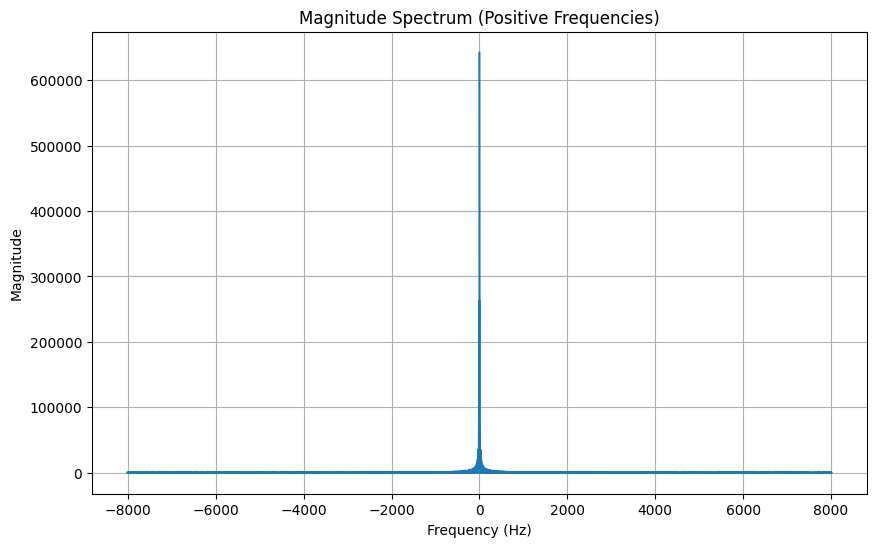

In [6]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(fft_df['Frequency'], fft_df['FFT Magnitude'])  # Plot positive frequency vs magnitude
plt.title('Magnitude Spectrum (Positive Frequencies)')  # Title of the plot
plt.xlabel('Frequency (Hz)')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot

In [7]:
numpy_array = fft_df.to_numpy()
print(os.getcwd())
# Save the array to a file
np.save((present_dir+'withbaby_test.npy'), numpy_array)

/
